In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt     


In [2]:

def plot_history(history : tf.keras.callbacks.History):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')




In [3]:
#this is a new directory that has the total train_set from 00 to 10; NOT ano!!!
directory = './dataset/' 
img_dim = 128


In [4]:
#data_set 
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    
    color_mode="grayscale",
    
    image_size=(img_dim,img_dim),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
)

Found 6571 files belonging to 11 classes.
Using 5257 files for training.


In [6]:
#parameters
input_size = 128
filter = 32

strides = (2, 2)
pool_size = (2,2)
kernel_size = (6,6)

In [11]:
from tensorflow.keras import layers, models

# Create the first version of the model
model = models.Sequential([
    layers.Conv2D(filters=64,kernel_size=kernel_size,activation='relu',input_shape=(128,128,1)),
    
    layers.MaxPooling2D(pool_size=pool_size),
    layers.Conv2D(filters=32,kernel_size=kernel_size,activation='relu'),
    layers.MaxPooling2D(pool_size=pool_size),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(11,activation='Softmax'),
    
    
    
])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 123, 123, 64)      2368      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 32)        73760     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)            

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#using the GPU
with tf.device('/GPU:0'):
    history = model.fit(train_dataset,epochs=5)

In [36]:
print(model.metrics)

[<keras.metrics.Mean object at 0x0000018EB0F1D610>, <keras.metrics.MeanMetricWrapper object at 0x0000018ECDAAB970>]


KeyError: 'val_accuracy'

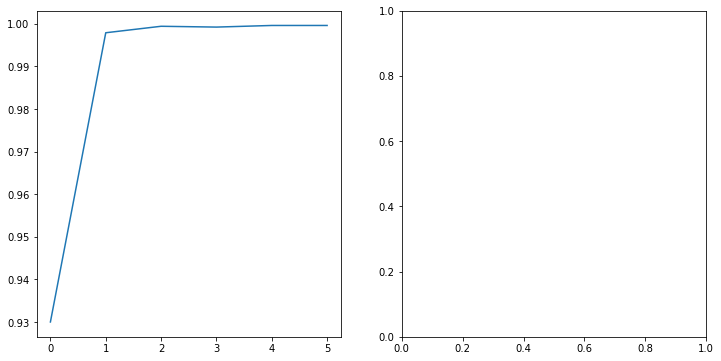

In [10]:
plot_history(history)

In [13]:
model.evaluate(train_dataset)

165/165 [==============================] - 7s 43ms/step - loss: 8.8747e-04 - accuracy: 0.9998


[0.000887469679582864, 0.9998098015785217]

In [14]:
#model.save('cnn_model1')

INFO:tensorflow:Assets written to: cnn_model1\assets


INFO:tensorflow:Assets written to: cnn_model1\assets
